Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import path

Defining file paths and configurations

In [2]:
DATA_DIR = './data'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'
TRAIN_PROC_FILE = 'train_processed.csv'
TEST_PROC_FILE = 'test_processed.csv'

In [3]:
train_df = pd.read_csv(path.join(DATA_DIR, TRAIN_FILE), index_col='PassengerId')
test_df = pd.read_csv(path.join(DATA_DIR, TEST_FILE), index_col='PassengerId')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [7]:
def replace_titles(x):
    title = x['Title']
    sex = x['Sex']
    age = x['Age']
    if title in ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'the Countess', 'Jonkheer']:
        if (sex in ['male']) & (age > 12.0):
            return 'Mr'
        elif (sex in ['male']) & (age <= 12.0):
            return 'Master'
        elif (sex in ['female']) & (age <= 28.0):
            return 'Miss'
        else:
            return 'Mrs'
    else:
        return title

In [8]:
pclass_map = {1: 'First', 2: 'Second', 3: 'Third'}

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

train_df['Title'] = train_df['Name'].map(lambda x: get_title(x))
train_df['Title'] = train_df.apply(replace_titles, axis=1)
test_df['Title'] = test_df['Name'].map(lambda x: get_title(x))
test_df['Title'] = test_df.apply(replace_titles, axis=1)

train_df['Pclass'] = train_df['Pclass'].map(pclass_map)
test_df['Pclass'] = test_df['Pclass'].map(pclass_map)

train_df['Age'] = train_df['Age'].fillna(train_df.groupby("Title")['Age'].transform("mean"))
test_df['Age'] = test_df['Age'].fillna(test_df.groupby("Title")['Age'].transform("mean"))

In [9]:
for pclass in train_df['Pclass'].unique():
    print("Class: {}\tMax Fare: {}\t Min Fare: {}\n".format(pclass, train_df[train_df['Pclass']==pclass]['Fare'].max(), train_df[train_df['Pclass']==pclass]['Fare'].min()))

Class: Third	Max Fare: 69.55	 Min Fare: 0.0

Class: First	Max Fare: 512.3292	 Min Fare: 0.0

Class: Second	Max Fare: 73.5	 Min Fare: 0.0



In [10]:
drop_cols = ['Name', 'Ticket', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

------------------------------------------

### Visual analysis

Text(0.5,1,'Survival by Sex')

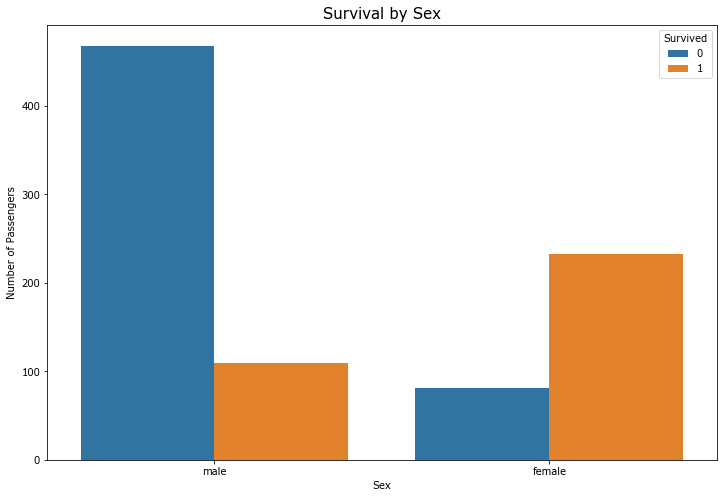

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x="Sex", hue="Survived")

plt.xlabel("Sex", size=10)
plt.ylabel("Number of Passengers", size=10)
plt.title("Survival by Sex", size=15)

Text(0.5,1,'Survival by Title')

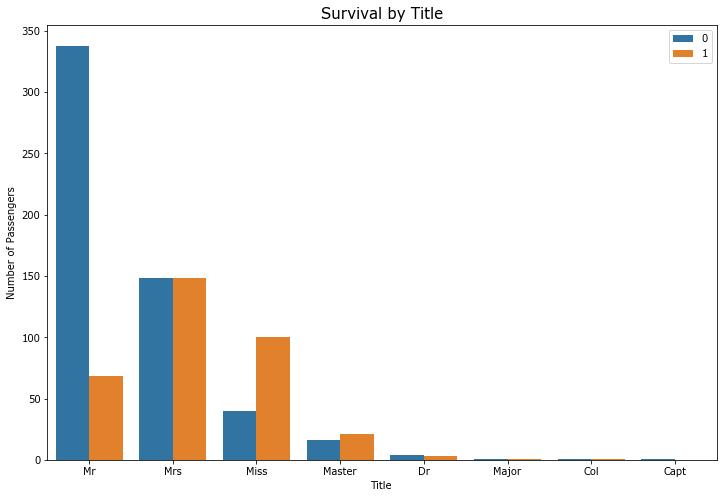

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x="Title", hue="Survived")

plt.xlabel("Title", size=10)
plt.ylabel("Number of Passengers", size=10)
plt.legend(loc='upper right')
plt.title("Survival by Title", size=15)

Text(0.5,1,'Survival by Port of Boarding')

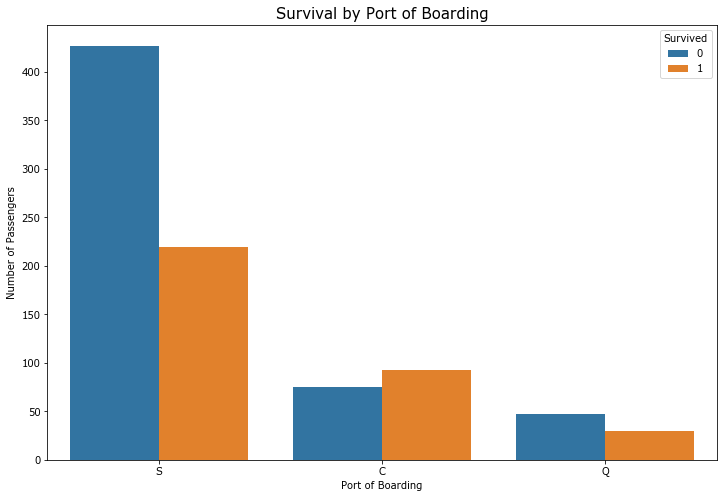

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x="Embarked", hue="Survived")

plt.xlabel("Port of Boarding", size=10)
plt.ylabel("Number of Passengers", size=10)
plt.title("Survival by Port of Boarding", size=15)

Text(0.5,1,'Survival by Port of Boarding')

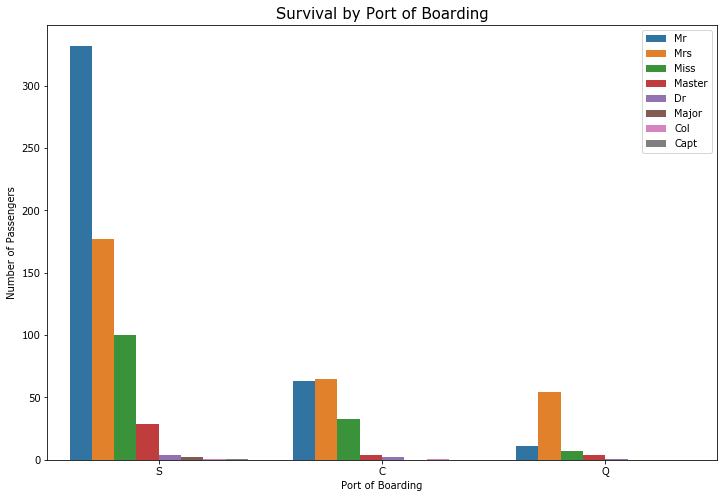

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x="Embarked", hue="Title")

plt.xlabel("Port of Boarding", size=10)
plt.ylabel("Number of Passengers", size=10)
plt.legend(loc='upper right')
plt.title("Survival by Port of Boarding", size=15)

C:\Users\varun.varma\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Fare by Passenger Class')

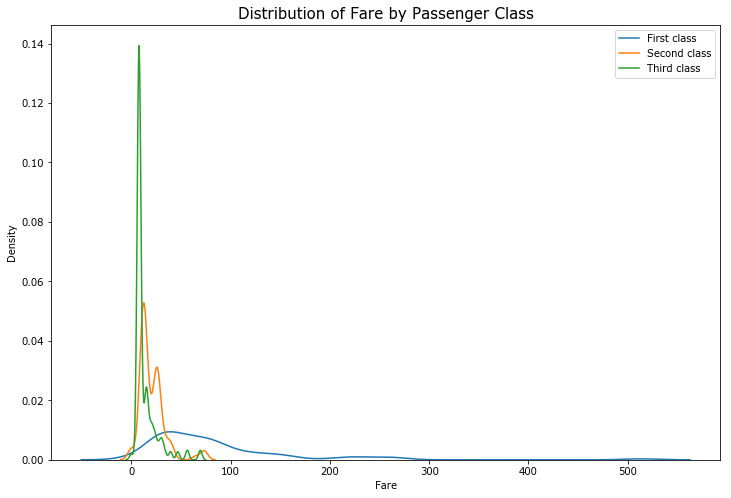

In [15]:
plt.figure(figsize=(12, 8))
sns.kdeplot(train_df[train_df['Pclass']=='First']['Fare'], shade=False, label='First class')
sns.kdeplot(train_df[train_df['Pclass']=='Second']['Fare'], shade=False, label='Second class')
sns.kdeplot(train_df[train_df['Pclass']=='Third']['Fare'], shade=False, label='Third class')

plt.xlabel("Fare", size=10)
plt.ylabel("Density", size=10)
plt.legend(loc='upper right')
plt.title("Distribution of Fare by Passenger Class", size=15)

C:\Users\varun.varma\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Age by Gender')

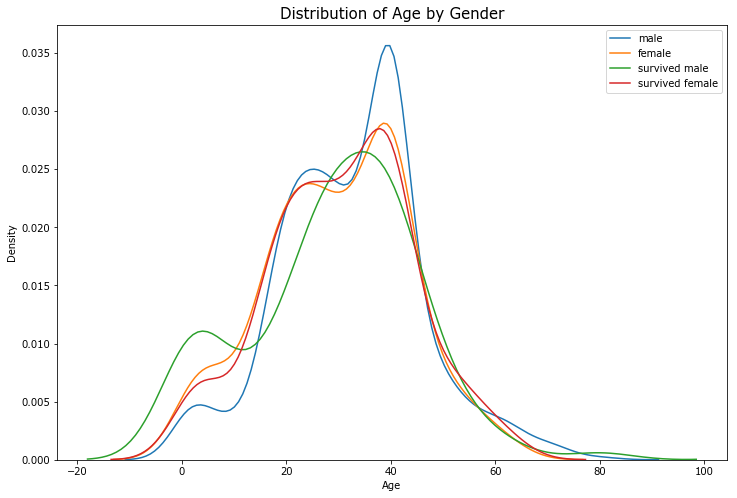

In [16]:
plt.figure(figsize=(12, 8))
sns.kdeplot(train_df[train_df['Sex']=='male']['Age'], shade=False, label='male')
sns.kdeplot(train_df[train_df['Sex']=='female']['Age'], shade=False, label='female')

sns.kdeplot(train_df[(train_df['Sex']=='male') & (train_df['Survived']==1)]['Age'], shade=False, label='survived male')
sns.kdeplot(train_df[(train_df['Sex']=='female') & (train_df['Survived']==1)]['Age'], shade=False, label='survived female')

plt.xlabel("Age", size=10)
plt.ylabel("Density", size=10)
plt.legend(loc='upper right')
plt.title("Distribution of Age by Gender", size=15)

In [17]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

In [18]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [19]:
train_df.to_csv(path.join(DATA_DIR, TRAIN_PROC_FILE), index=None)
test_df.to_csv(path.join(DATA_DIR, TEST_PROC_FILE), index=None)